In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder as LE, StandardScaler as SS
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression as LR,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor as KNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor as GBR, RandomForestRegressor as RFR, AdaBoostRegressor as ABR
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.externals import joblib


import warnings
warnings.filterwarnings('ignore')

C:\Users\Lenovo\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
data_train = pd.read_excel('datasets/Project_18_Doctors_Consultation_Fee_Train.xlsx')
data_test  = pd.read_excel('datasets/Project_18_Doctors_Consultation_Fee_Test.xlsx')

In [3]:
print("Shape of train dataset", data_train.shape)
print("Shape of test dataset", data_test.shape)

Shape of train dataset (5961, 7)
Shape of test dataset (1987, 6)


In [4]:
data_train.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Missing values are present in train dataset, we will fill those missing values further.

In [5]:
data_test.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [6]:
data_train.head(10)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
5,BAMS,8 years experience,NaN,"Porur, Chennai",Ayurveda,NaN,100
6,BHMS,42 years experience,NaN,"Karol Bagh, Delhi",Homeopath,NaN,200
7,BDS,10 years experience,99%,"Arekere, Bangalore",Dentist,Dental Fillings Crowns and Bridges Fixing Impa...,200
8,"MBBS, MD - General Medicine",14 years experience,NaN,"Old City, Hyderabad",General Medicine,NaN,100
9,"BSc, BDS",23 years experience,NaN,"Athani, Ernakulam",Dentist,NaN,100


In [7]:
#Checking for unique values in dataset

data_train.nunique()

Qualification         1420
Experience              64
Rating                  51
Place                  877
Profile                  6
Miscellaneous_Info    2998
Fees                    40
dtype: int64

In [8]:
data_test.nunique()

Qualification          630
Experience              57
Rating                  36
Place                  592
Profile                  6
Miscellaneous_Info    1084
dtype: int64

We will take one column one by one for processing

In [9]:
#removing years experience from experience

data_train['Experience'] = data_train['Experience'].str.replace('years experience','').astype(int)
data_test['Experience'] = data_test['Experience'].str.replace('years experience','').astype(int)

In [10]:
#Removing % from rating

data_train["Rating"]=data_train["Rating"].str.strip("%")
data_train["Rating"]=data_train["Rating"].astype(float)

data_test["Rating"]=data_test["Rating"].str.strip("%")
data_test["Rating"]=data_test["Rating"].astype(float)

In [11]:
#Checkign for null values in Rating
print(data_train.Rating.isnull().sum())
print(data_test.Rating.isnull().sum())

3302
1090


More than 50% of ratings is missing, we cannot remove those values neither we can fill it by using mean or median, cause it varies for each doctor. But we can fill NaN values with integer value that is 0. 

In [12]:
data_train["Rating"].fillna(0,inplace=True)
data_test["Rating"].fillna(0,inplace=True)

In [13]:
#Checking again for null values in Rating
print(data_train.Rating.isnull().sum())
print(data_test.Rating.isnull().sum())

0
0


In [14]:
data_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [15]:
#CHecking null values in Place
print(data_train.Place.isnull().sum())
print(data_test.Place.isnull().sum())

25
6


In [16]:
#We will replace null values with 'missing vales'

data_train['Place'].fillna('missing', inplace=True)
data_test['Place'].fillna('missing', inplace=True)

In [17]:
#CHecking null values in Place
print(data_train.Place.isnull().sum())
print(data_test.Place.isnull().sum())

0
0


In [18]:
#Seperating place with City and Locality

data_train['City'] = data_train['Place'].str.split(',').str[1]
data_train['Locality'] = data_train['Place'].str.split(',').str[0]

data_test['City'] = data_test['Place'].str.split(',').str[1]
data_test['Locality'] = data_test['Place'].str.split(',').str[0]

In [19]:
data_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai


In [20]:
data_train.City.value_counts()

 Bangalore             1258
 Mumbai                1219
 Delhi                 1184
 Hyderabad              951
 Chennai                855
 Coimbatore             228
 Ernakulam              153
 Thiruvananthapuram      86
 Sector 5                 1
Name: City, dtype: int64

In [21]:
data_train.City.unique()

array([' Ernakulam', ' Bangalore', ' Chennai', ' Delhi', ' Hyderabad',
       ' Coimbatore', ' Mumbai', ' Thiruvananthapuram', nan, ' Sector 5'],
      dtype=object)

In [22]:
data_train.Locality.value_counts()

HSR Layout       75
Andheri West     70
Dwarka           68
Banjara Hills    64
Mulund West      54
                 ..
Paradise          1
Nettoor           1
Hennur            1
VV Puram          1
Ganganagar        1
Name: Locality, Length: 867, dtype: int64

In [23]:
#checking for Qualification 

data_train.Qualification.value_counts()

BDS                                                                                                                                                      488
BHMS                                                                                                                                                     477
BAMS                                                                                                                                                     471
MBBS                                                                                                                                                     334
MBBS, MS - ENT                                                                                                                                           220
                                                                                                                                                        ... 
BHMS, BPTh/BPT, MSc - Psychotherapy And Counselling       

In [24]:
data_train.Qualification.unique()

array(['BHMS, MD - Homeopathy', 'BAMS, MD - Ayurveda Medicine',
       'MBBS, MS - Otorhinolaryngology', ...,
       'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery',
       'BDS, certification in smile designing',
       'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)'],
      dtype=object)

In [25]:
#We will split the qualification into multiple column

data_train['Qualification_1'] = data_train['Qualification'].str.split(',').str[0]
data_train['Qualification_2'] = data_train['Qualification'].str.split(',').str[1]
data_train['Qualification_3'] = data_train['Qualification'].str.split(',').str[2]

In [26]:
data_test['Qualification_1'] = data_test['Qualification'].str.split(',').str[0]
data_test['Qualification_2'] = data_test['Qualification'].str.split(',').str[1]
data_test['Qualification_3'] = data_test['Qualification'].str.split(',').str[2]

In [27]:
data_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qualification_1,Qualification_2,Qualification_3
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,BAMS,NaN,NaN


In [28]:
#Seperating Miscellaneous_Info info into multiple columns

#Seperating % from the string
data_train['Misc_Info'] = data_train['Miscellaneous_Info'].str.split('%').str[0]

#Getting length of Misc_Info column
data_train['Misc_Info_Len'] = data_train['Misc_Info'].str.len()

#Checkign for the length greater than 3
data_train.loc[data_train['Misc_Info_Len']>3, 'Misc_Info'] = 0

#Replacing null values with 0
data_train['Misc_Info'].fillna(0,inplace = True)

#Converting Misc_Info to integer datatype
data_train['Misc_Info'] = data_train['Misc_Info'].astype(int)

In [29]:
data_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc_Info,Misc_Info_Len
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0


In [30]:
#Getting values after % 
data_train['Misc_Info_2'] = data_train['Miscellaneous_Info'].str.split('% ').str[1]

In [31]:
data_train['Misc_Info_3'] = data_train['Misc_Info_2'].str.split(' ').str[0]
data_train['Misc_Info_3'].fillna(0,inplace = True)
data_train['Misc_Info_Len_3'] = data_train['Misc_Info_3'].str.len()
data_train.loc[data_train['Misc_Info_Len_3']>3, 'Misc_Info_3'] = 0
data_train.loc[data_train['Misc_Info_3']==',', 'Misc_Info_3'] = 0
data_train['Misc_Info_3'] = data_train['Misc_Info_3'].astype(int)

In [32]:
data_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc_Info,Misc_Info_Len,Misc_Info_2,Misc_Info_3,Misc_Info_Len_3
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN,NaN,0,NaN
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0,NaN,0,NaN
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0


In [33]:
#Combning rating and feedback count got from the above


data_train['Misc_Info_4'] = data_train['Misc_Info']*np.log((1+data_train['Misc_Info_3']))

In [34]:
data_train.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc_Info,Misc_Info_Len,Misc_Info_2,Misc_Info_3,Misc_Info_Len_3,Misc_Info_4
0,"BHMS, MD - Homeopathy",24,100.0,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Ernakulam,Kakkanad,BHMS,MD - Homeopathy,NaN,100,3.0,"16 Feedback Kakkanad, Ernakulam",16,2.0,283.321334
1,"BAMS, MD - Ayurveda Medicine",12,98.0,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Bangalore,Whitefield,BAMS,MD - Ayurveda Medicine,NaN,98,2.0,"76 Feedback Whitefield, Bangalore",76,2.0,425.692931
2,"MBBS, MS - Otorhinolaryngology",9,0.0,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Bangalore,Mathikere - BEL,MBBS,MS - Otorhinolaryngology,NaN,0,NaN,NaN,0,NaN,0.000000
3,"BSc - Zoology, BAMS",12,0.0,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Bangalore,Bannerghatta Road,BSc - Zoology,BAMS,NaN,0,58.0,NaN,0,NaN,0.000000
4,BAMS,20,100.0,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Chennai,Keelkattalai,BAMS,NaN,NaN,100,3.0,"4 Feedback Keelkattalai, Chennai",4,1.0,160.943791


In [35]:
#Seperating Miscellaneous_Info info into multiple columns

#Seperating % from the string
data_test['Misc_Info'] = data_test['Miscellaneous_Info'].str.split('%').str[0]

#Getting length of Misc_Info column
data_test['Misc_Info_Len'] = data_test['Misc_Info'].str.len()

#Checkign for the length greater than 3
data_test.loc[data_test['Misc_Info_Len']>3, 'Misc_Info'] = 0

#Replacing null values with 0
data_test['Misc_Info'].fillna(0,inplace = True)

#Converting Misc_Info to integer datatype
data_test['Misc_Info'] = data_test['Misc_Info'].astype(int)

#Getting values after % 
data_test['Misc_Info_2'] = data_test['Miscellaneous_Info'].str.split('% ').str[1]

data_test['Misc_Info_3'] = data_test['Misc_Info_2'].str.split(' ').str[0]
data_test['Misc_Info_3'].fillna(0,inplace = True)
data_test['Misc_Info_Len_3'] = data_test['Misc_Info_3'].str.len()
data_test.loc[data_test['Misc_Info_Len_3']>3, 'Misc_Info_3'] = 0
data_test.loc[data_test['Misc_Info_3']==',', 'Misc_Info_3'] = 0
data_test['Misc_Info_3'] = data_test['Misc_Info_3'].astype(int)

In [36]:
#Combning rating and feedback count got from the above


data_test['Misc_Info_4'] = data_test['Misc_Info']*np.log((1+data_test['Misc_Info_3']))

In [37]:
data_test.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,City,Locality,Qualification_1,Qualification_2,Qualification_3,Misc_Info,Misc_Info_Len,Misc_Info_2,Misc_Info_3,Misc_Info_Len_3,Misc_Info_4
0,MBBS,35,0.0,"Ghatkopar East, Mumbai",General Medicine,NaN,Mumbai,Ghatkopar East,MBBS,NaN,NaN,0,NaN,NaN,0,NaN,0.000000
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31,0.0,"West Marredpally, Hyderabad",ENT Specialist,NaN,Hyderabad,West Marredpally,MBBS,Diploma in Otorhinolaryngology (DLO),NaN,0,NaN,NaN,0,NaN,0.000000
2,"MBBS, DDVL",40,70.0,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Chennai,KK Nagar,MBBS,DDVL,NaN,70,2.0,"4 Feedback KK Nagar, Chennai",4,1.0,112.660654
3,BAMS,0,0.0,"New Ashok Nagar, Delhi",Ayurveda,NaN,Delhi,New Ashok Nagar,BAMS,NaN,NaN,0,NaN,NaN,0,NaN,0.000000
4,"BDS, MDS - Conservative Dentistry & Endodontics",16,100.0,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Bangalore,Kanakpura Road,BDS,MDS - Conservative Dentistry & Endodontics,NaN,0,70.0,NaN,0,NaN,0.000000


In [38]:
data_train['Profile'].unique()

array(['Homeopath', 'Ayurveda', 'ENT Specialist', 'Dentist',
       'General Medicine', 'Dermatologists'], dtype=object)

In [39]:
#Dropping len col
data_train.drop(["Misc_Info_Len_3","Misc_Info_Len","Miscellaneous_Info","Place","Qualification"],axis=1,inplace=True)

In [40]:
data_train.isnull().sum()

Experience            0
Rating                0
Profile               0
Fees                  0
City                 26
Locality              0
Qualification_1       0
Qualification_2    1962
Qualification_3    4590
Misc_Info             0
Misc_Info_2        4454
Misc_Info_3           0
Misc_Info_4           0
dtype: int64

In [41]:
#Filling missing values

data_train['City'].fillna("missing",inplace = True)
data_train['Qualification_2'].fillna("missing",inplace = True)
data_train['Qualification_3'].fillna("missing",inplace = True)
data_train['Misc_Info_2'].fillna("missing",inplace = True)

In [42]:
data_test.isnull().sum()

Qualification            0
Experience               0
Rating                   0
Place                    0
Profile                  0
Miscellaneous_Info     834
City                     6
Locality                 0
Qualification_1          0
Qualification_2        609
Qualification_3       1498
Misc_Info                0
Misc_Info_Len          834
Misc_Info_2           1435
Misc_Info_3              0
Misc_Info_Len_3       1435
Misc_Info_4              0
dtype: int64

In [43]:
#Dropping len col
data_test.drop(["Misc_Info_Len_3","Misc_Info_Len","Miscellaneous_Info","Place","Qualification"],axis=1,inplace=True)

In [44]:
#Filling missing values

data_test['City'].fillna("missing",inplace = True)
data_test['Qualification_2'].fillna("missing",inplace = True)
data_test['Qualification_3'].fillna("missing",inplace = True)
data_test['Misc_Info_2'].fillna("missing",inplace = True)

In [45]:
data_test.isnull().sum()

Experience         0
Rating             0
Profile            0
City               0
Locality           0
Qualification_1    0
Qualification_2    0
Qualification_3    0
Misc_Info          0
Misc_Info_2        0
Misc_Info_3        0
Misc_Info_4        0
dtype: int64

### Visualizing data

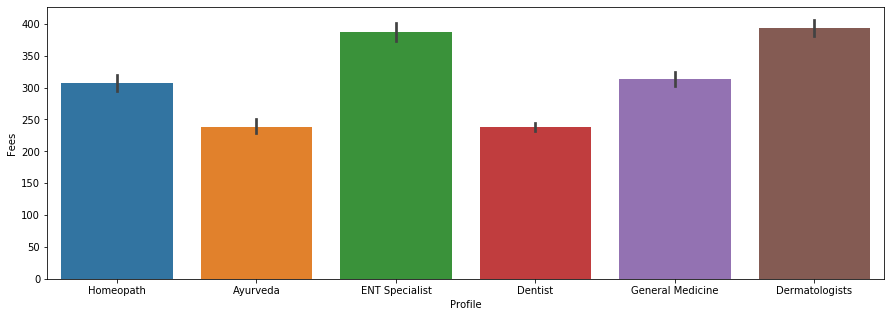

In [46]:
#Visualizing data

plt.figure(figsize=(15,5))
sns.barplot(x="Profile",y="Fees",data=data_train)
plt.show()

ENT Specialist and Dermatologists are having more fees

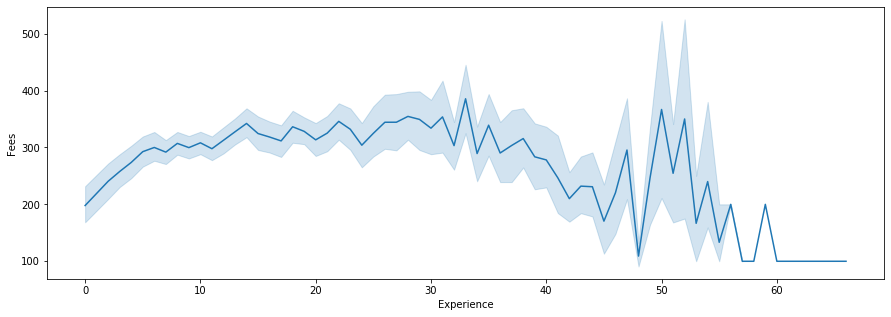

In [47]:
plt.figure(figsize=(15,5))
sns.lineplot(x="Experience",y="Fees",data=data_train)
plt.show()

Fees is high for doctor having experience between 15 to 40.

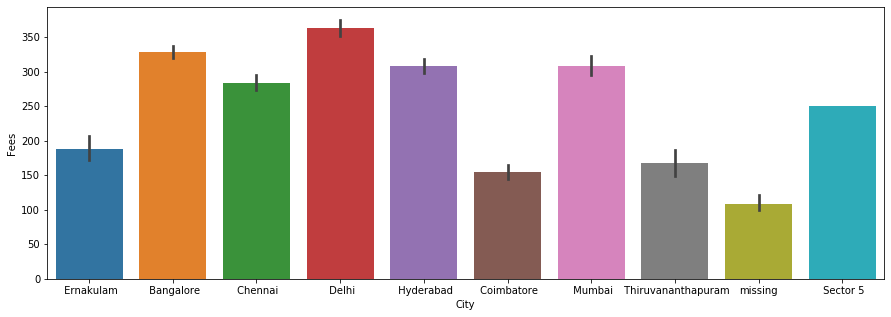

In [48]:
plt.figure(figsize=(15,5))
sns.barplot(x="City",y="Fees",data=data_train)
plt.show()

Average fees is high for city Delhi, Banglore, Mumbai and Hyderabad.

In [49]:
data_train['Profile'].dtypes

dtype('O')

In [50]:
#Encoding categorical data

le = LE()

for col in data_train.columns:
    if data_train[col].dtype=="object":
        data_train[col]=le.fit_transform(data_train[col])

In [51]:
#Encoding categorical data

le = LE()

for col in data_test.columns:
    if data_test[col].dtype=="object":
        data_test[col]=le.fit_transform(data_test[col])

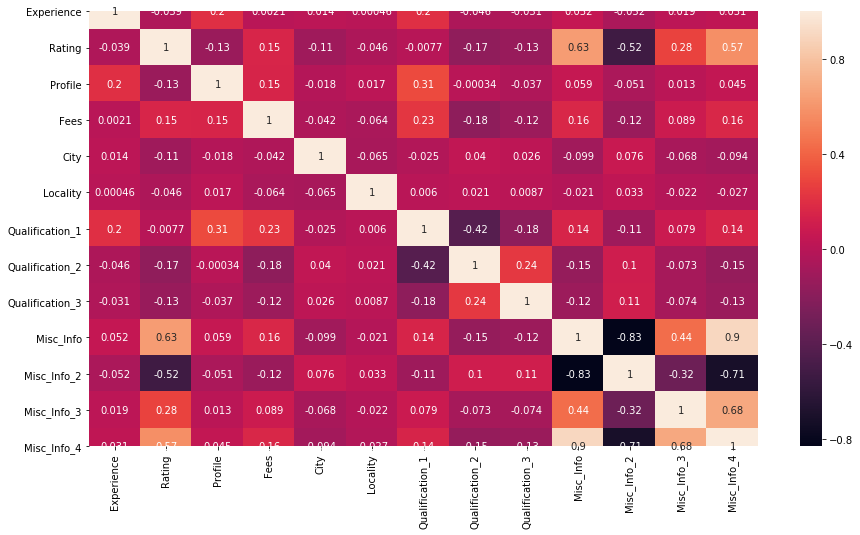

In [52]:
#Checking the correlation of dataset
plt.figure(figsize=(15,8))
sns.heatmap(data_train.corr(),annot=True)

As we can see fees is moderately correlated with all.

### SPLITTING DATA

In [53]:
x = data_train.drop(columns=["Fees"])
y = data_train.Fees

In [54]:
x.shape, y.shape

((5961, 12), (5961,))

In [55]:
data_test.shape

(1987, 12)

In [56]:
data_test.columns

Index(['Experience', 'Rating', 'Profile', 'City', 'Locality',
       'Qualification_1', 'Qualification_2', 'Qualification_3', 'Misc_Info',
       'Misc_Info_2', 'Misc_Info_3', 'Misc_Info_4'],
      dtype='object')

In [57]:
x.columns

Index(['Experience', 'Rating', 'Profile', 'City', 'Locality',
       'Qualification_1', 'Qualification_2', 'Qualification_3', 'Misc_Info',
       'Misc_Info_2', 'Misc_Info_3', 'Misc_Info_4'],
      dtype='object')

In [58]:
#Scaling data
ss=SS()
ss.fit(x)
x=ss.transform(x)

### TRAIN TEST SPLIT

In [59]:
def main_fun(models):
    r2_scores = []
    for model,name in models.items():
        print("Checking R2 score for",name)
        i = 0
        max_r2_score = 0 #max accuracy score defining
        for r_state in range(42,101):
            train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=r_state)
            model.fit(train_x,train_y)
            pred_y = model.predict(test_x)
            r2_scr = r2_score(test_y,pred_y)
            r2_scr = round(r2_scr*100)
            if r2_scr > max_r2_score:
                max_r2_score = r2_scr
                final_r_state = r_state
        print("Max R2 Score Corresponding to random state ", final_r_state, " is ",max_r2_score)
        print()
        print("-----------------------------------------------------------------------------------------------")
        r2_scores.append(max_r2_score)
    return r2_scores

In [60]:
#Finding best parameters for KNN

neighbors = {"n_neighbors":range(1,30)}
knn = KNR()
gknn = GridSearchCV(knn,neighbors,cv=10)
gknn.fit(x,y)
gknn.best_params_

{'n_neighbors': 29}

In [61]:
#Finding best parameters for RFR

rfr = RFR() 

param_grid = { 
    'n_estimators': [50, 100,200]
}

CV_rfc = GridSearchCV(estimator=rfr, param_grid=param_grid, cv= 5)
CV_rfc.fit(x, y)
CV_rfc.best_params_

{'n_estimators': 200}

In [62]:
#Using SVR

svr=SVR()
parameters={"kernel":["linear", "poly", "rbf"],"C":[0.001,0.01,0.1,1,10]}
clf = GridSearchCV(svr, parameters, cv=5,scoring="r2")
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [63]:
#Instantiate the classifiers
clf_lr = LR()
clf_dtree = DTR()
clf_knn =  KNR(n_neighbors=29)
clf_rfr = RFR(n_estimators=200)
clf_adr = ABR()
clf_gbr = GBR()
clf_svr = SVR(kernel="rbf",C=10)

In [64]:
regressor = ['LinearRegression', 'DecisionTree', 'KNR', 'RandomForest', 'Adaboost','GradientBoost','SVR']

In [65]:
models = {clf_lr:'LinearRegression',
          clf_dtree:'DecisionTree',
          clf_knn: 'KNN',
          clf_rfr: 'RandomForest',
          clf_adr: 'Adaboost',
          clf_gbr: 'GradientBoost',
          clf_svr: 'SVR'
         }

In [66]:
r2_scores = main_fun(models)

Checking R2 score for LinearRegression
Max R2 Score Corresponding to random state  44  is  13.0

-----------------------------------------------------------------------------------------------
Checking R2 score for DecisionTree
Max R2 Score Corresponding to random state  44  is  0

-----------------------------------------------------------------------------------------------
Checking R2 score for KNN
Max R2 Score Corresponding to random state  63  is  18.0

-----------------------------------------------------------------------------------------------
Checking R2 score for RandomForest
Max R2 Score Corresponding to random state  63  is  23.0

-----------------------------------------------------------------------------------------------
Checking R2 score for Adaboost
Max R2 Score Corresponding to random state  44  is  16.0

-----------------------------------------------------------------------------------------------
Checking R2 score for GradientBoost
Max R2 Score Corresponding to r

In [67]:
#Displaying score by train test split
pd.DataFrame(r2_scores,columns = ['R2 Scores'],index = regressor).sort_values(by = 'R2 Scores',ascending = False)

,R2 Scores
GradientBoost,25.0
RandomForest,23.0
KNR,18.0
Adaboost,16.0
SVR,14.0
LinearRegression,13.0
DecisionTree,0.0


### USING GRADIENT BOOSTING REGRESSOR TO PREDICT FEES FOR TEST DATA

In [68]:
#RFR gave max score for random state =51
gbr=GBR()
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=63)
gbr.fit(train_x,train_y)
pred_y = gbr.predict(test_x)
r2_scr=r2_score(test_y,pred_y)
r2_scr = round(r2_scr*100)
print("R2 score is : ", r2_scr)
print('MAE:', mean_absolute_error(test_y, pred_y))
print('MSE:', mean_squared_error(test_y, pred_y))
print('RMSE:', np.sqrt(mean_squared_error(test_y, pred_y)))

R2 score is :  25.0
MAE: 130.94791264133622
MSE: 27701.32579620764
RMSE: 166.4371526919625


In [69]:
x.shape

(5961, 12)

In [70]:
data_test.shape

(1987, 12)

In [71]:
#Lets predict data with test dataset

pred_test_data = gbr.predict(data_test)

In [72]:
#Adding Fees column in dataframe
fees_pred_test_data = pd.DataFrame(pred_test_data,columns=["Fees"])

In [73]:
#Saving predicted data in csv file
fees_pred_test_data.to_csv("Project_18_Doctors_Consultation_Fee_Prediction.csv",index=False)

### SAVIND MODEL

In [74]:
joblib.dump(gbr, 'Project_18_Doctors_Consultation_Fee.pkl')

['Project_18_Doctors_Consultation_Fee.pkl']

### CONCLUSION

In this project, two seperate dataset were given for training and testing, after importing dataset I got some features such Qualification, Profile, Places, Rating etc. As Qualification was almost unique for all rows in dataset, hence had to do some data preprocessing on Qualification, Miscellaneous_Info, Place. I had seperate Qualification info into 3 different columns seperated by ','. Also seperated City and Locality from Places. And obtained feedback, ratings from Miscellaneous_Info.

In this dataset Rating was also missing for more than 50% of data hence had to replace with 0. Also fill many missing values with 'missing' value.

After prprocessing of data, I had visualize some data into graphs and found that Average fees was high for city Delhi, Banglore, Mumbai and Hyderabad. 

Aslo Fees was high for doctor having experience between 15 to 40 and doctor with profile ENT Specialist and Dermatologists were having more fees.

After preprocessing of data, data been seperated into x and y and scaled x data.

To test the model GridSearchCV has been used to find the best parameters for Algorithm. And looped all algorithm in one model to get r2 score. 